In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
df = pd.read_excel('../excel-files/citizen.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userid       50000 non-null  object 
 1   createddate  50000 non-null  object 
 2   gender       49996 non-null  object 
 3   age          49996 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [6]:
df.head()

,userid,createddate,gender,age
0,327cd302d9eea33f3e460be74009c5f1d092d8bc2cc91f...,2020-10-18 02:58:59.204000,Эрэгтэй,34.0
1,df42cd83d6621ae3dc53f95979585006e194aa39940d7d...,2020-10-18 02:58:59.281000,Эрэгтэй,38.0
2,0c24924e541eaa5bfe22e5587cf1b00cebfa20e395480d...,2020-10-18 02:58:59.294000,Эрэгтэй,47.0
3,cb50f6d8de079cd902cf6f200ad350b2fa42d48f51231f...,2020-10-18 02:58:59.304000,Эрэгтэй,30.0
4,cff98dabecba14996eb02a6deac5bbdf2e26e9529a62cf...,2020-10-18 02:58:59.312000,Эрэгтэй,36.0


In [9]:
df.isnull().sum()

userid         0
createddate    0
gender         0
age            0
dtype: int64

In [8]:
df =df.dropna(subset=['age'])

In [10]:
df['gender'] = df['gender'].str.lower()
df = df.dropna(subset=['gender', 'age'])
df['age'] = df['age'].astype('int')

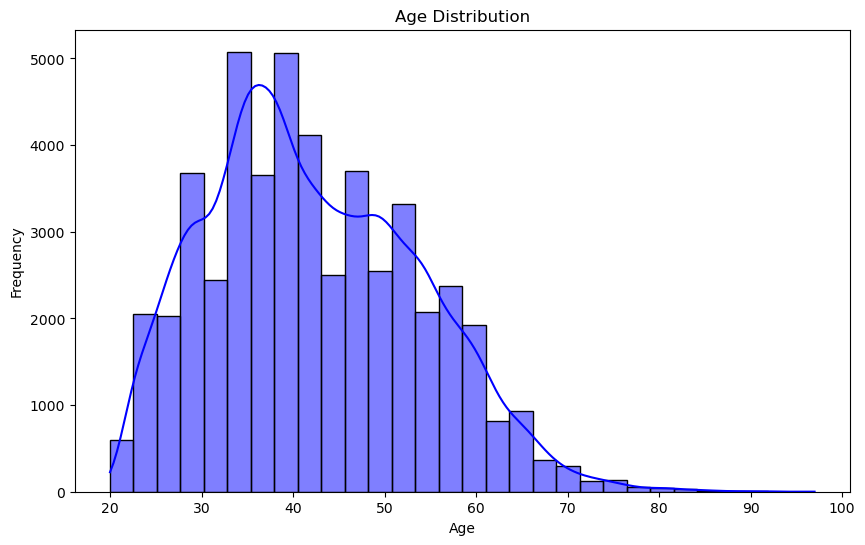

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

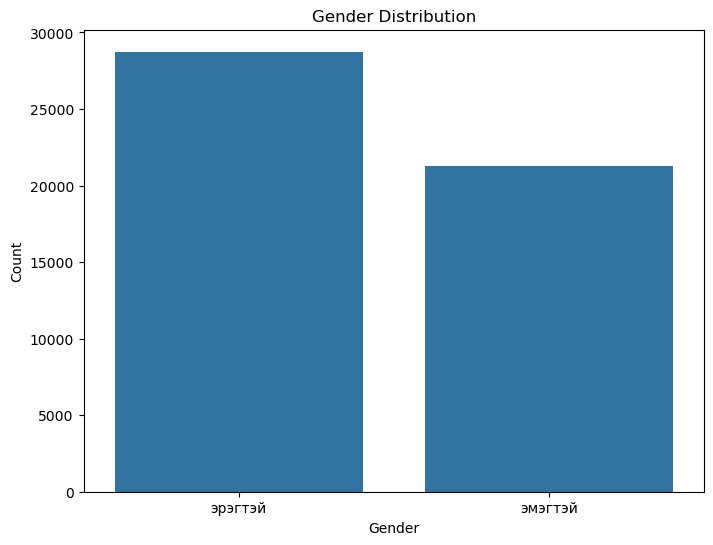

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [11]:
ages = df['age'].values.reshape(-1, 1)

In [12]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['age_cluster'] = kmeans.fit_predict(ages)


In [15]:
centers = sorted(kmeans.cluster_centers_.flatten())
centers

[24.85564808883207,
 30.613030862569367,
 37.33500947383775,
 45.92510667943928,
 54.956721311475306,
 65.78732227488163]

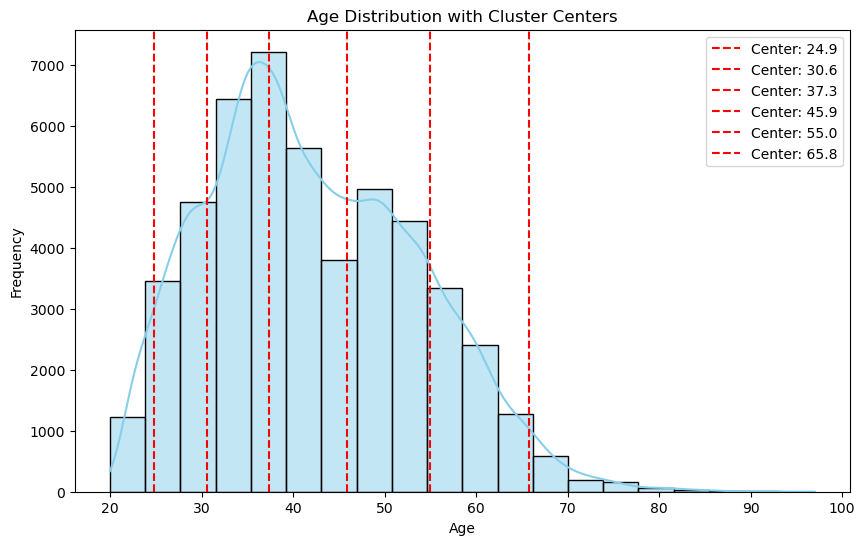

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color="skyblue")
for center in centers:
    plt.axvline(center, color='red', linestyle='--', label=f'Center: {center:.1f}')
plt.title("Age Distribution with Cluster Centers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()